In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [60]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [62]:
data.describe()
#data.head(15)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [64]:
#data.loc[data['HouseYear']>2020]

In [65]:
#data.loc[data['HouseYear']==20052011,'HouseYear']=2008
#data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [66]:
#data.loc[data['Square']<data['KitchenSquare']+data['LifeSquare']]
#data.loc[data['KitchenSquare']>250]

In [67]:
#data.loc[data['KitchenSquare']==2014,'KitchenSquare']=data['Square']-data['LifeSquare']

In [68]:
#data.loc[data['KitchenSquare']>250]

In [69]:
#data.loc[data['KitchenSquare']==1970,'KitchenSquare']=data['Square']-data['LifeSquare']

In [70]:
#data.loc[data['KitchenSquare']>250]

In [71]:
#data.loc[data['LifeSquare']>250]

In [72]:
#data.loc[round(data['LifeSquare'],2)==263.54,'LifeSquare']=data['Square']-data['KitchenSquare']

In [73]:
#data.loc[round(data['LifeSquare'],2)==7480.59,'LifeSquare']=data['Square']-data['KitchenSquare']

In [74]:
#data.loc[round(data['LifeSquare'],2)==461.46,'LifeSquare']=data['Square']-data['KitchenSquare']

In [75]:
#data.loc[round(data['LifeSquare'],2)==461.46]
data.loc[data['Square']>155]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,NaN,2,6,B,338644.075979
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,NaN,3,10,B,232766.187698
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,NaN,0,0,B,190949.293998
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,217874.997452
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,645.0,6,6,B,367353.574566
3651,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,200800.673767
4047,15362,23,1.0,163.286965,161.155275,1.0,4,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,228572.520347


In [76]:
data.loc[data['Square']<10,'Square']=data['LifeSquare']+data['KitchenSquare']


In [77]:
data.loc[data['Square']<10,'Square']=data['Square']*10

In [78]:
data.loc[data['Square']<10,'Square']=data['Square']*10

In [79]:
data.loc[data['Square']>300,'Square']=data['Square']/10

In [80]:
data.loc[data['Square']>150,'Square']=data['Square']-50

In [81]:
train,valid=train_test_split(data, test_size=0.3, random_state=42)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [83]:
train.shape, valid.shape

((7000, 20), (3000, 20))

In [84]:
scaler=MinMaxScaler()

In [85]:
train_scaled=scaler.fit_transform(train.loc[:,['Square','DistrictId']])

In [86]:
train_scaled

array([[0.20429573, 0.11004785],
       [0.73021389, 0.11004785],
       [0.1898596 , 0.41626794],
       ...,
       [0.50854013, 0.00478469],
       [0.27513848, 0.44976077],
       [0.54617349, 0.00956938]])

In [87]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=10)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(f"{i} temp_inertia {temp_inertia} ")
    inertia_arr.append(temp_inertia)

2 temp_inertia 213.36422882791908 
3 temp_inertia 150.99359006340245 
4 temp_inertia 113.93768254123023 
5 temp_inertia 92.87410423377108 
6 temp_inertia 76.78845251924292 
7 temp_inertia 66.156101214866 
8 temp_inertia 57.36644836222021 
9 temp_inertia 50.35580943743684 


Text(0.5, 1.0, 'INERTIA')

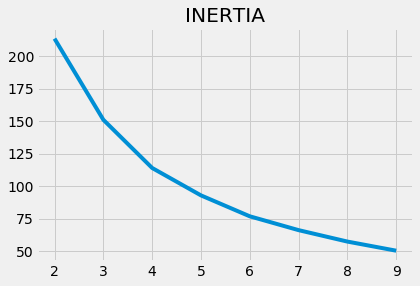

In [88]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA')

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
model=AgglomerativeClustering(n_clusters=5)

In [91]:
train['cluster_Square']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

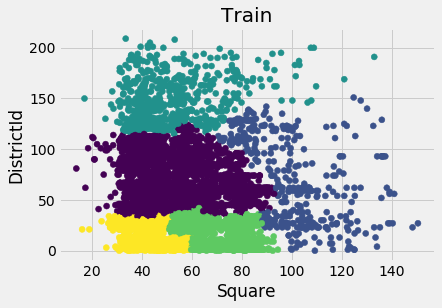

In [92]:
plt.scatter(train['Square'],train['DistrictId'],c=train['cluster_Square'])
plt.xlabel('Square')
plt.ylabel('DistrictId')
plt.title('Train')

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn=KNeighborsClassifier(n_neighbors=5)

In [95]:
knn.fit(train_scaled,train['cluster_Square'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [96]:
valid_scaled=scaler.transform(valid.loc[:,['Square','DistrictId']])

In [97]:
valid['cluster_Square']=knn.predict(valid_scaled)

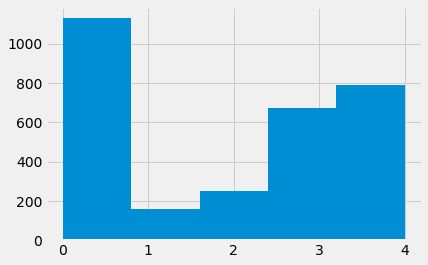

In [98]:
valid['cluster_Square'].hist(bins=5);

In [99]:
distr_info1=train['DistrictId'].value_counts().reset_index().rename(columns={'DistrictId':'large_district','index':'DistrictId'})

In [100]:
distr_info1.describe()

,DistrictId,large_district
count,202.000000,202.000000
mean,100.792079,34.653465
std,58.930909,68.051624
min,0.000000,1.000000
25%,50.250000,5.000000
50%,100.500000,14.000000
75%,150.750000,40.750000
max,209.000000,574.000000


In [101]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [102]:
distr_info1.head()

,DistrictId,large_district,is_large
0,27,574,1
1,1,466,1
2,23,394,1
3,6,355,1
4,9,222,1


In [103]:
distr_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
DistrictId        202 non-null int64
large_district    202 non-null int64
is_large          202 non-null int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [104]:
def add_distr_info(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [105]:
price=train['Price'].mean()
price

214449.1673897029

In [106]:
price_mean_by_rooms= train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_rooms.head()

,Rooms,mean_price_by_rooms
0,0.0,184599.160110
1,1.0,160134.810901
2,2.0,215287.628931
3,3.0,290867.452543
4,4.0,385776.526291


In [107]:
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_dr'})
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,147116.367405
4,1,2.0,198775.648383


In [108]:
#price_mean_by_house_year=train.groupby(['DistrictId','HouseYear'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_hy'})
#price_mean_by_house_year.head()

In [109]:
#price_mean_by_house_year,
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
 #   df=pd.merge(df,price_mean_by_house_year,on='HouseYear',how='left')
    df['mean_price_by_dr']= df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
 #   df['mean_price_by_hy']=df['mean_price_by_hy'].fillna(price)
    return df

In [110]:
def dummies_d(df,cluster_year='cluster_Square'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [111]:
train=add_distr_info(train,distr_info1)

In [112]:
#,price_mean_by_house_year
train=add_mean_price(train,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [113]:
train=dummies_d(train)

In [114]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_Square_0', 'cluster_Square_1', 'cluster_Square_2',
       'cluster_Square_3', 'cluster_Square_4'],
      dtype='object')

In [115]:
#train

In [116]:
#'cluster_Square_3',  
feats=['Rooms','large_district', 'is_large','cluster_Square_0', 'cluster_Square_1', 'cluster_Square_2', 'cluster_Square_4','HouseYear', 'Ecology_1']

In [117]:
from sklearn.ensemble import RandomForestRegressor as RF
model=RF(n_estimators=40,max_depth=10,random_state=42)
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()

In [118]:
model.fit(train.loc[:,feats],train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [119]:
#feats_n = ['large_district', 'is_large', 'cluster_Square_0', 'cluster_Square_1', 'cluster_Square_2','cluster_Square_3', 'cluster_Square_4']
#plt.barh(feats_n, model.coef_.flatten())
#plt.xlabel('Вес признака')
#plt.ylabel('Признак')

In [120]:
valid=add_distr_info(valid, distr_info1)

In [121]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Id                3000 non-null int64
DistrictId        3000 non-null int64
Rooms             3000 non-null float64
Square            3000 non-null float64
LifeSquare        2373 non-null float64
KitchenSquare     3000 non-null float64
Floor             3000 non-null int64
HouseFloor        3000 non-null float64
HouseYear         3000 non-null int64
Ecology_1         3000 non-null float64
Ecology_2         3000 non-null object
Ecology_3         3000 non-null object
Social_1          3000 non-null int64
Social_2          3000 non-null int64
Social_3          3000 non-null int64
Healthcare_1      1560 non-null float64
Helthcare_2       3000 non-null int64
Shops_1           3000 non-null int64
Shops_2           3000 non-null object
Price             3000 non-null float64
cluster_Square    3000 non-null int64
large_district    3000 non-null float64
is_large          3000 non-null floa

In [122]:
#,price_mean_by_house_year
valid=add_mean_price(valid,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [123]:
valid=dummies_d(valid)

In [124]:
y_pred=model.predict(valid.loc[:,feats])

In [125]:
y_pred

array([170921.34362664, 221184.84503066, 213246.71079777, ...,
       268268.21317408, 116104.88859515, 231776.51271541])

In [126]:
from sklearn.metrics import r2_score as r2

In [127]:
r2(valid['Price'],y_pred)

0.6489002304748457

In [128]:
r2(train['Price'],model.predict(train.loc[:,feats]))

0.8062832058866813

In [129]:
test_scaled=scaler.transform(test.loc[:,['Square','DistrictId']])
test['cluster_Square']=knn.predict(test_scaled)

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        3959 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
cluster_Square    5000 non-null int64
dtypes: float64(7), int64(10), object(3)
memory usage: 781.3+ KB


In [131]:
test=add_distr_info(test,distr_info1)
#, price_mean_by_house_year
test=add_mean_price(test,price_mean_by_distr_rooms,price_mean_by_rooms ,price)
test=dummies_d(test)

In [132]:
test['Price']=model.predict(test.loc[:,feats])

In [133]:
test.loc[:,['Id','Price']].to_csv('SZabudkin_predictions.csv',index=None)

In [134]:
pd.read_csv('SZabudkin_predictions.csv')

,Id,Price
0,725,162310.018310
1,15856,250765.228857
2,5480,295995.922790
3,15664,263978.913460
4,14275,130945.938044
5,7633,201408.635683
6,13329,164884.269758
7,5502,218744.679589
8,4220,304339.350034
9,11538,203493.829699
